## G-TAB example usage

When querying Google Trends, it outputs scores as integers in the range [0, 100]. These scores are relative.
For example, when we query Facebook (/m/02y1vz) and Twitter (/m/0289n8t), we get the following:

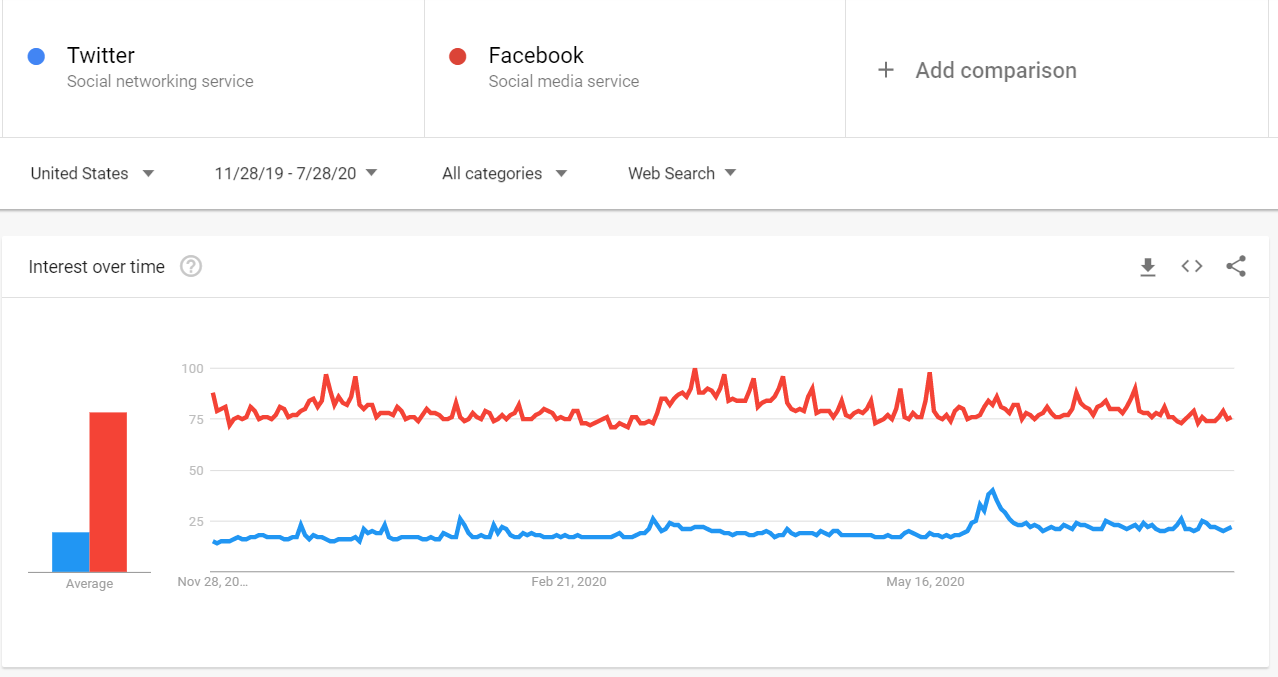

In [7]:
from IPython.display import display, Image
display(Image(filename='./imgs/fb_tw.png'))

Continuing the example, if we query Twitter (/m/0289n8t) and eBay (/m/0z90c), we get the following:

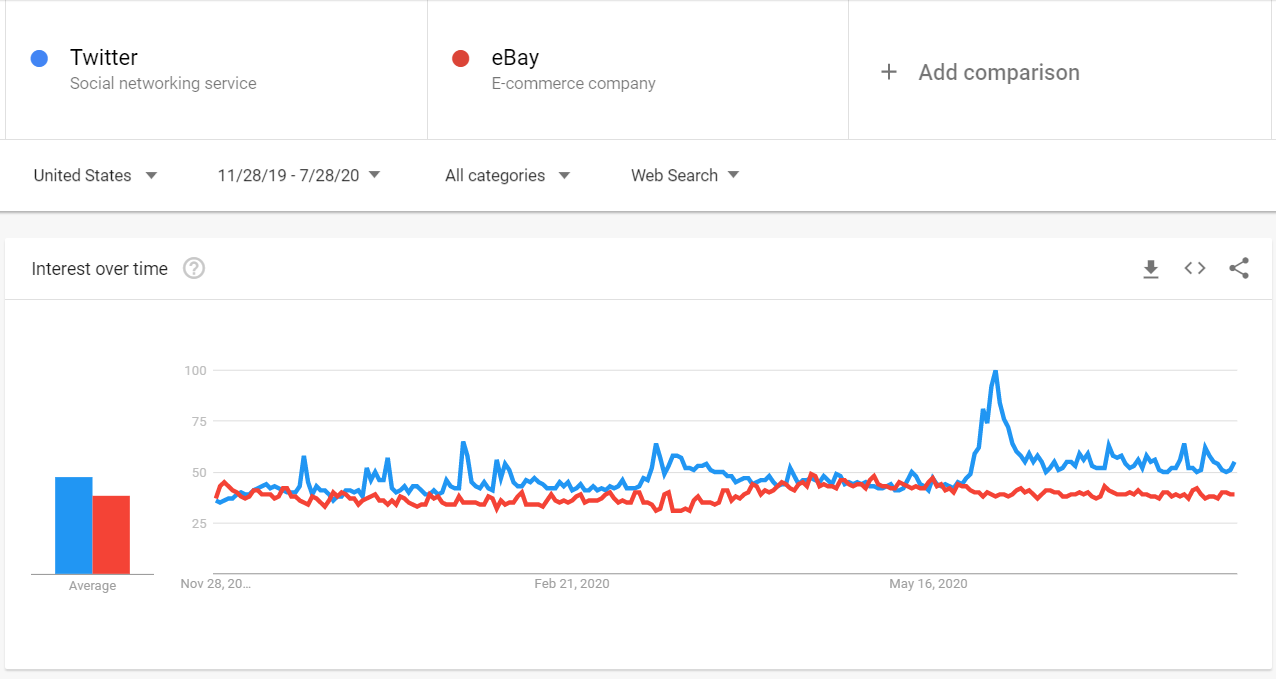

In [8]:
from IPython.display import display, Image
display(Image(filename='./imgs/tw_eb.png'))

However, if we want to compare Facebook to eBay there is no available information. In this example we just used three keywords, but Google Trends limits us to five keywords per query, which means that if we want to compare more than five keywords we cannot obtain accurate data.

To solve this issue we can use G-TAB! 

### Using G-TAB

#### Getting data for a new keyword with an existing G-TAB

In [1]:
!pip install gtab

In [11]:
import gtab

We need to create a GTAB object with the desired path. This will create and initialize the directory structure of my_path if it does not exist. If it does, it assumes we have already set up that directory for use.

In [34]:
my_path = "example_path"
t = gtab.GTAB(dir_path = my_path)

Directory already exists, loading data from it.
Using directory example_path


There are three default G-TABs included in the package. To list the available G-TABs call:

In [36]:
t.list_gtabs()

Existing GTABs:
	google_anchorbank_geo=IT_timeframe=2019-11-28 2020-07-28.tsv
	google_anchorbank_geo=SE_timeframe=2019-11-28 2020-07-28.tsv
	google_anchorbank_geo=US_timeframe=2019-11-28 2020-07-28.tsv
Active anchorbank: None selected.



To select which G-TAB to use, call:

In [37]:
t.set_active_gtab("google_anchorbank_geo=IT_timeframe=2019-11-28 2020-07-28.tsv")

Active anchorbank changed to: google_anchorbank_geo=IT_timeframe=2019-11-28 2020-07-28.tsv



Let's see what our G-TAB looks like:

In [38]:
t.anchor_bank_full

,base,lo,hi
/m/0mgkg,2615.179121,2347.767011,2917.474178
/m/0glpjll,836.857319,763.024279,919.004366
/m/019rl6,276.162915,255.613133,298.676419
/m/010qmszp,93.895391,88.186531,100.056600
/m/0b2334,32.863387,31.306219,34.519527
/m/020jl4,15.117158,14.557392,15.706385
/m/015zfk,6.802721,6.623613,6.989341
/m/01bp38,2.040816,2.020202,2.061856
/m/04jm3v,1.000000,1.000000,1.000000
/m/02zk4n,0.490000,0.485000,0.495000


We now need to set the desired config options (location, timeframe, etc.):

In [39]:
t.set_options(ptrends_config = {"geo": "US", "timeframe": "2019-11-28 2020-07-28" })

Now we can request a new query and calibrate it using our selected G-TAB!

In [50]:
mid = "/m/0z90c" # freebase code for eBay
nq_res= t.new_query(mid) 

Using example_path\output\google_anchorbanks\google_anchorbank_geo=IT_timeframe=2019-11-28 2020-07-28.tsv
New query '/m/0z90c'
New query calibrated!


Let's look at the ratios:

In [45]:
print(f'Ratio: {nq_res[mid]["ratio"]}')
print(f'Ratio low: {nq_res[mid]["ratio_lo"]}')
print(f'Ratio high: {nq_res[mid]["ratio_hi"]}')

Ratio: 460.2715252192433
Ratio low: 415.8482318906992
Ratio high: 510.04742319824214


Let's look at the whole time series over the specified timeframe:

In [46]:
print(f'Time series: {nq_res[mid]["ts"]}')

Time series: [343.1115006179814, 401.6915129186123, 418.42865929022116, 393.32293973280787, 384.9543665470035, 368.2172201753947, 351.4800738037858, 343.1115006179814, 343.1115006179814, 376.5857933611991, 368.2172201753947, 351.4800738037858, 351.4800738037858, 359.84864698959024, 343.1115006179814, 343.1115006179814, 384.9543665470035, 384.9543665470035, 351.4800738037858, 343.1115006179814, 334.74292743217694, 326.37435424637255, 318.0057810605681, 351.4800738037858, 343.1115006179814, 318.0057810605681, 301.26863468895925, 334.74292743217694, 368.2172201753947, 351.4800738037858, 368.2172201753947, 359.84864698959024, 334.74292743217694, 334.74292743217694, 318.0057810605681, 334.74292743217694, 343.1115006179814, 351.4800738037858, 359.84864698959024, 334.74292743217694, 326.37435424637255, 318.0057810605681, 326.37435424637255, 309.6372078747637, 351.4800738037858, 343.1115006179814, 318.0057810605681, 318.0057810605681, 309.6372078747637, 309.6372078747637, 318.0057810605681, 35

#### Creating your own G-TAB

In [51]:
my_path = "example_path"
t = gtab.GTAB(dir_path = my_path)

Directory already exists, loading data from it.
Using directory example_path


For example, if we want to construct a G-TAB with data from Germany between March 5th 2020 and May 5th 2020, we set:


In [52]:
t.set_options(ptrends_config = {"geo": "DE", "timeframe": "2020-03-05 2020-05-05"})

We also need to specify which file to use for sampling the keywords (if we're not using the default). This file needs to be located at my_path/data/my_data_file.txt and contains one keyword per line.

In [53]:
t.set_options(gtab_config = {"anchor_candidates_file": "my_data_file.txt"})

We then need to set N and K, as described in the paper. For example, if we want to set N=3000 and K=500, we call:

In [54]:
t.set_options(gtab_config = {"num_anchor_candidates": 3000, "num_anchors": 500})

All of the config options can be directly edited in the config file found at my_path/config/config.json.

Finally, we construct the G-TAB:

In [57]:
t.create_anchorbank() # takes a while to run since it queries Google Trends.

This will start querying Google Trends and calibrate the data and will take some time, depending on K. After it is constructed it can be listed and selected as described in the previous example.